In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

# df = pd.read_csv('Spotify_Youtube.csv') # REENABLE LATER
df = pd.read_csv('Spotify_Youtube.csv')

# Basic info

In [ ]:
# Features and basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13781 entries, 0 to 13780
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        13781 non-null  int64  
 1   Artist            13781 non-null  object 
 2   Url_spotify       13781 non-null  object 
 3   Track             13781 non-null  object 
 4   Album             13781 non-null  object 
 5   Album_type        13781 non-null  object 
 6   Uri               13781 non-null  object 
 7   Danceability      13780 non-null  float64
 8   Energy            13780 non-null  float64
 9   Key               13780 non-null  float64
 10  Loudness          13780 non-null  float64
 11  Speechiness       13780 non-null  float64
 12  Acousticness      13780 non-null  float64
 13  Instrumentalness  13780 non-null  float64
 14  Liveness          13780 non-null  float64
 15  Valence           13780 non-null  float64
 16  Tempo             13780 non-null  float6

In [ ]:
# Summary statistics for the dataset
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,13781.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,13780.000000,1.378000e+04,1.345800e+04,1.340100e+04,1.338700e+04,1.331000e+04
mean,6890.000000,0.599428,0.634557,5.256023,-8.148713,0.089151,0.294566,0.065874,0.197422,0.539352,120.076396,2.353481e+05,8.385591e+07,5.144517e+05,1.952180e+04,1.156660e+08
std,3978.376365,0.169570,0.226608,3.556586,5.017980,0.113085,0.295519,0.209582,0.174179,0.249646,29.676926,1.351295e+05,2.646119e+08,1.537001e+06,1.006287e+05,2.086581e+08
min,0.000000,0.000000,0.000252,0.000000,-44.761000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,3445.000000,0.491000,0.496000,2.000000,-9.483250,0.034200,0.038200,0.000000,0.092500,0.344000,96.077250,1.889640e+05,1.434532e+06,1.515600e+04,3.840000e+02,1.611519e+07
50%,6890.000000,0.615000,0.671000,5.000000,-6.829000,0.046200,0.188500,0.000006,0.126000,0.551000,119.002500,2.238200e+05,1.259618e+07,9.275300e+04,2.775000e+03,4.339329e+07
75%,10335.000000,0.724000,0.812000,8.000000,-5.089000,0.086925,0.495000,0.000944,0.248000,0.743000,139.031250,2.647730e+05,6.058257e+07,3.903150e+05,1.189100e+04,1.152477e+08
max,13780.000000,0.975000,0.998000,11.000000,0.920000,0.964000,0.996000,0.995000,1.000000,0.991000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,5.331537e+06,3.362005e+09


In [ ]:
df.shape

(13781, 28)

For this exploration, we only want to look at numerical columns:

In [ ]:
# display Numerical and Categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numerical Columns: {len(numerical_columns)}")
print(numerical_columns)
print(f"Categorical Columns: {len(categorical_columns)}")
print(categorical_columns)
print(f"Total Columns: {len(df.columns)}")

Numerical Columns: 16
['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
Categorical Columns: 12
['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description', 'Licensed', 'official_video']
Total Columns: 28


# Sub-sampling

In [ ]:
# Sub-samples for observation purpose
df_only_numerical = df[numerical_columns]
df_only_numerical.sample(n=10)

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
563,563,0.382,0.996,7.0,-4.119,0.1040,0.002080,0.000000,0.4170,0.327,93.345,147840.0,132263461.0,696184.0,30426.0,297647780.0
435,435,0.580,0.660,6.0,-7.405,0.0429,0.016600,0.000000,0.1740,0.411,123.801,266307.0,62379960.0,432601.0,10064.0,92083585.0
12578,12578,0.465,0.818,0.0,-7.924,0.0300,0.446000,0.976000,0.2320,0.530,148.427,244947.0,3860926.0,43749.0,1746.0,42352803.0
1170,1170,0.695,0.432,11.0,-8.195,0.0479,0.312000,0.000000,0.2960,0.765,81.109,216107.0,3174205.0,9345.0,271.0,201495248.0
5961,5961,0.463,0.724,11.0,-4.159,0.0468,0.275000,0.000001,0.1120,0.664,72.037,183920.0,1756597.0,10558.0,63.0,30000262.0
6417,6417,0.617,0.468,2.0,-6.908,0.0291,0.650000,0.000000,0.1410,0.333,119.921,225360.0,31586258.0,170129.0,4324.0,64962005.0
8130,8130,0.573,0.936,0.0,-4.195,0.0321,0.294000,0.032700,0.1160,0.784,106.103,262000.0,3439.0,48.0,2.0,NaN
11763,11763,0.710,0.375,0.0,-8.371,0.0664,0.135000,0.915000,0.0925,0.867,169.928,184040.0,1591820.0,9034.0,679.0,8346423.0
3154,3154,0.498,0.850,5.0,-6.494,0.0420,0.740000,0.000273,0.2920,0.935,101.299,303373.0,24514.0,391.0,22.0,22573910.0
6570,6570,0.527,0.937,9.0,-7.604,0.0582,0.000428,0.139000,0.0758,0.417,137.145,371853.0,185566.0,3774.0,8.0,1350566.0


<Axes: >

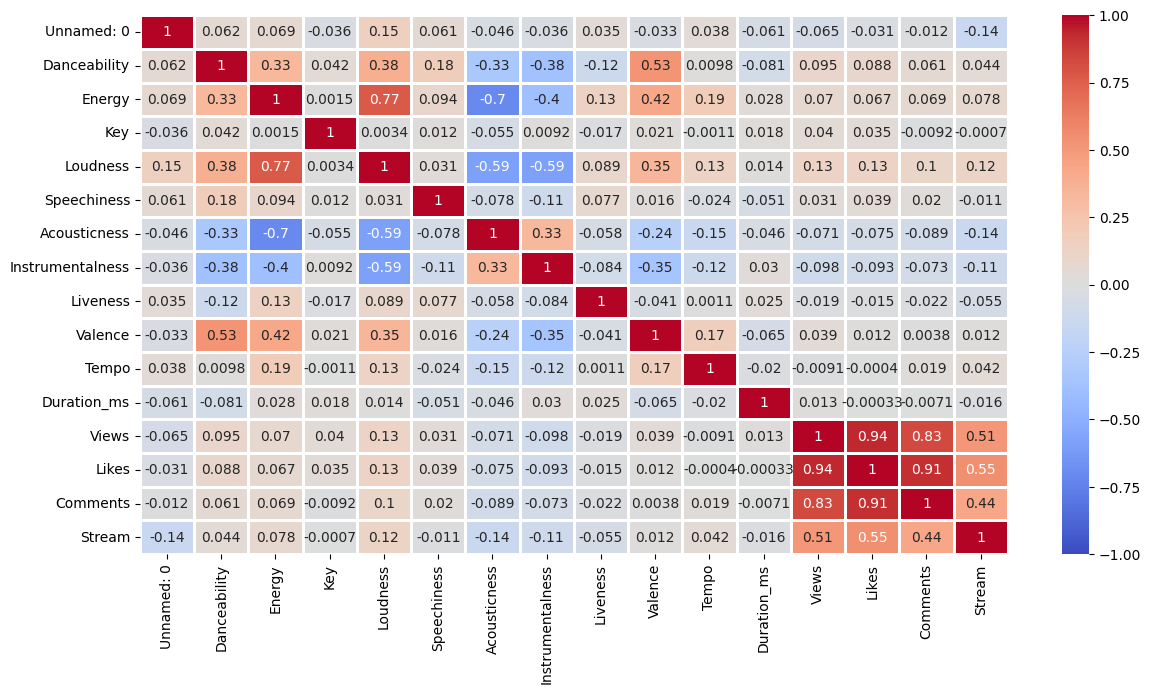

In [ ]:
SAMPLE_SIZE = 1000
# Picking a random sample of observations so that it is less time consuming and compute intensive to create heatmap
df_only_numerical_subsample = df_only_numerical.sample(SAMPLE_SIZE)

# To set the size of the figure in which the correlation heatmap is displyed
plt.figure(figsize=(14, 7))
sns.heatmap(df_only_numerical_subsample.corr(method='pearson'), annot = True, linewidth=1, fmt='.2g',
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', annot_kws={"fontsize": 10})

# Heatmap

In [ ]:
# display most frequent artists
n = 5
freq_artists = df['Artist'].value_counts()[:n].index.tolist()
freq_artists

['Gorillaz',
 'Los Prisioneros',
 'Liberación',
 'The Kiboomers',
 'Los Amables Del Norte']

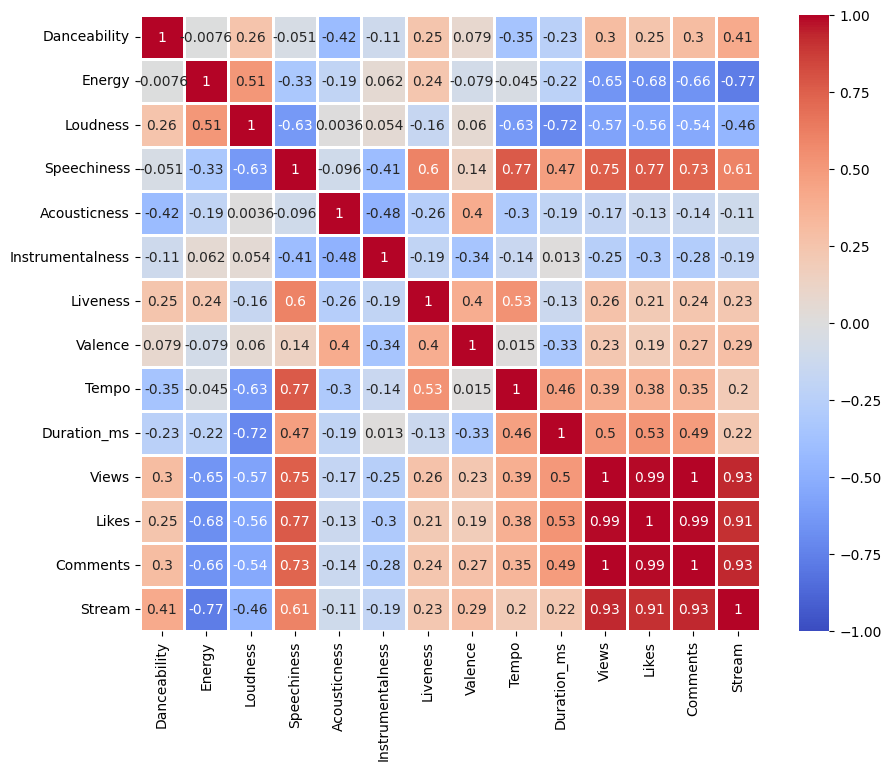

In [ ]:
# looking for trends in songs of the SAME ARTIST

df_Gorillaz = df[df['Artist'] == 'Gorillaz']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_Gorillaz_num = df_Gorillaz[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_Gorillaz_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2,
            fmt='.2g', cmap= 'coolwarm', annot=True)
plt.show()

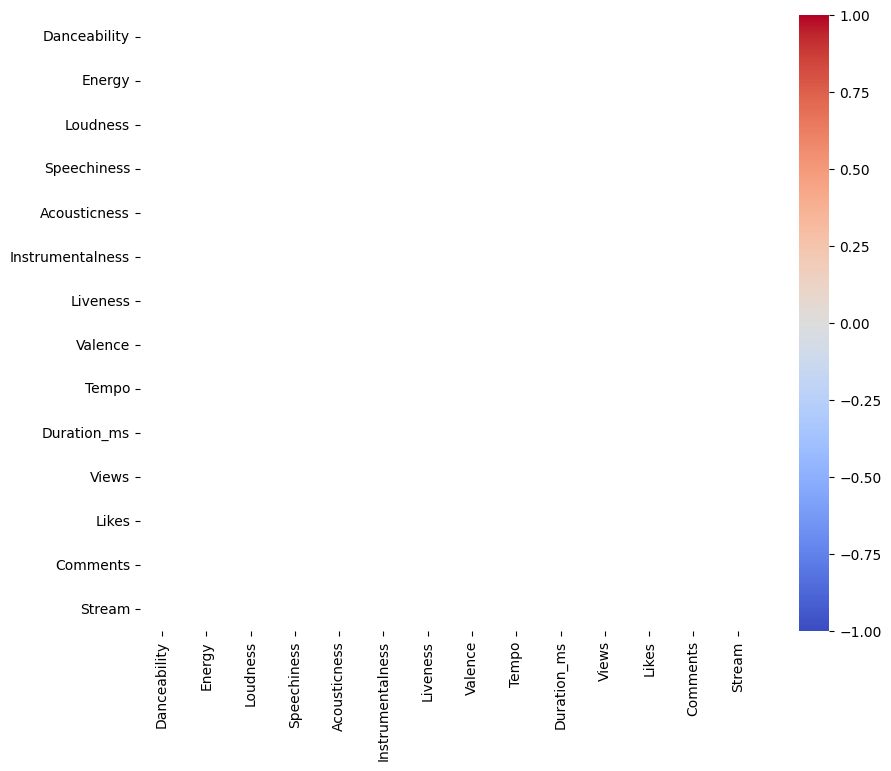

In [ ]:
df_HU = df[df['Artist'] == 'Hollywood Undead']
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]
df_HU_num = df_HU[num_cols]
plt.figure(figsize=(10, 8))
sns.heatmap(df_HU_num.corr(), vmin=-1, vmax=1, center= 0, linewidth=2, fmt='.2g',
            cmap= 'coolwarm', annot=True)
plt.show()

# Pairplot

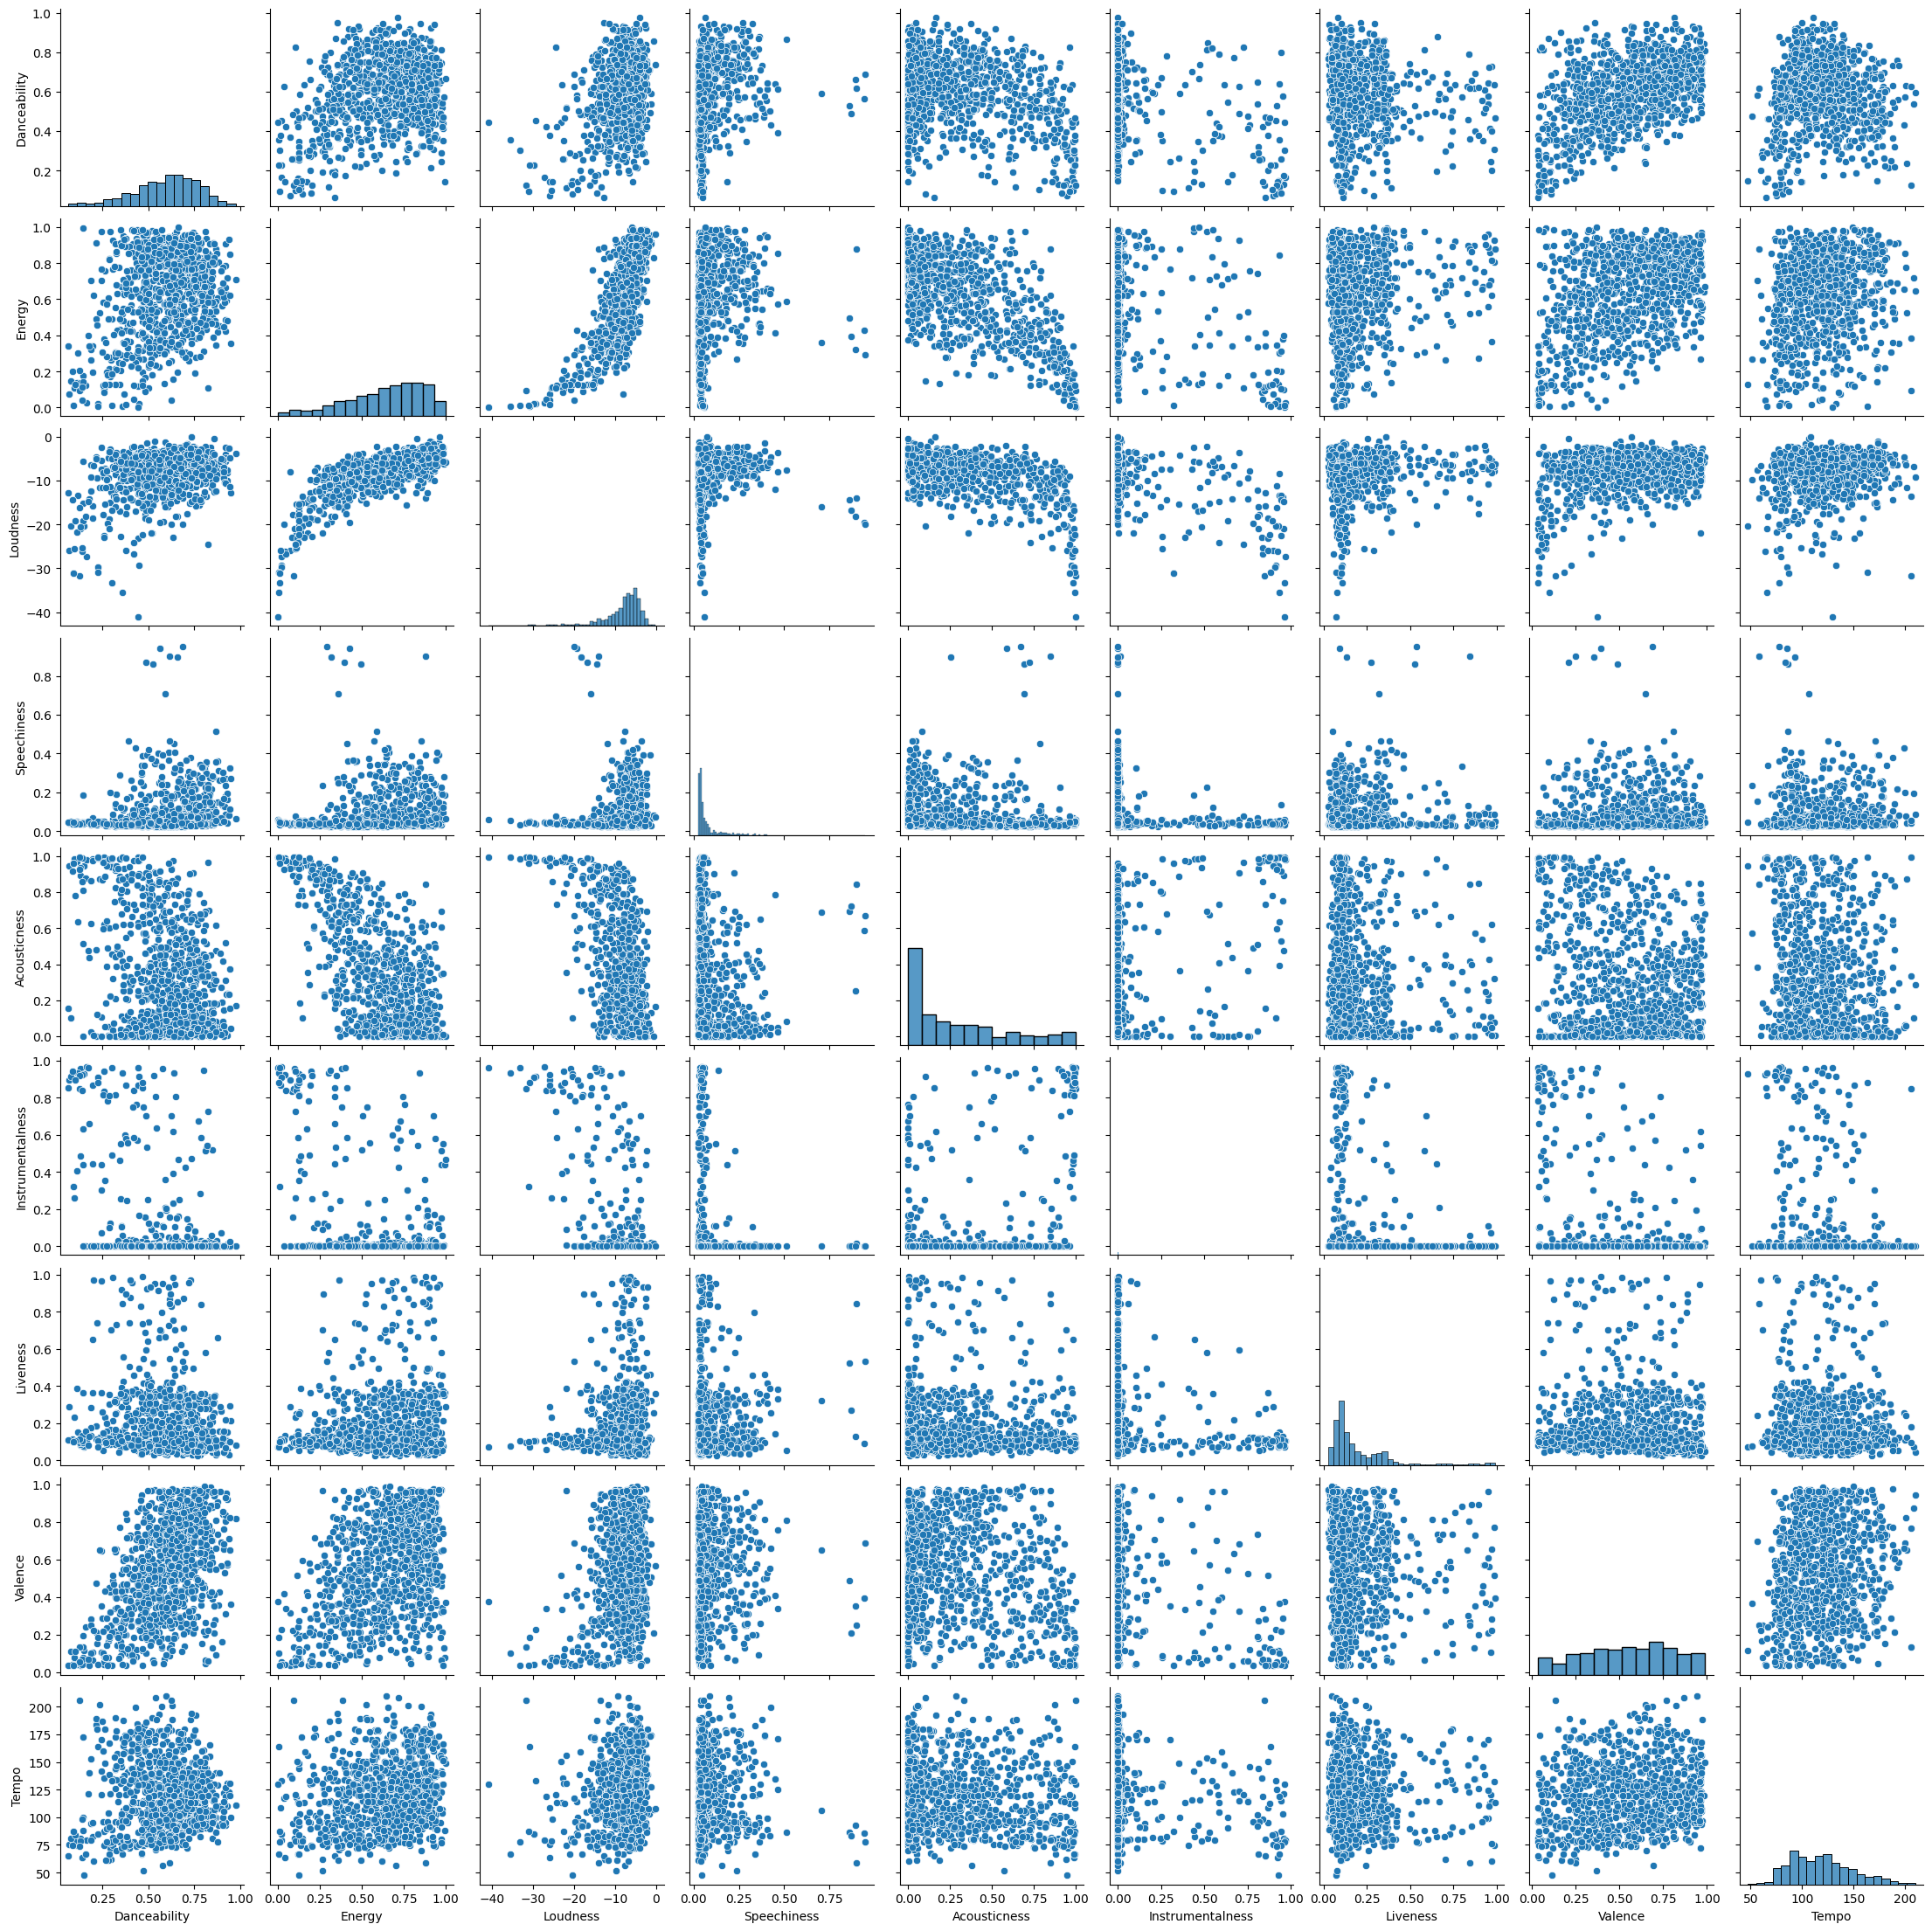

In [ ]:
#generate pairplots for relavent numerical vairable
df_important = df_only_numerical_subsample[["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"]]
sns.pairplot(df_important)
plt.show()

# Histogram

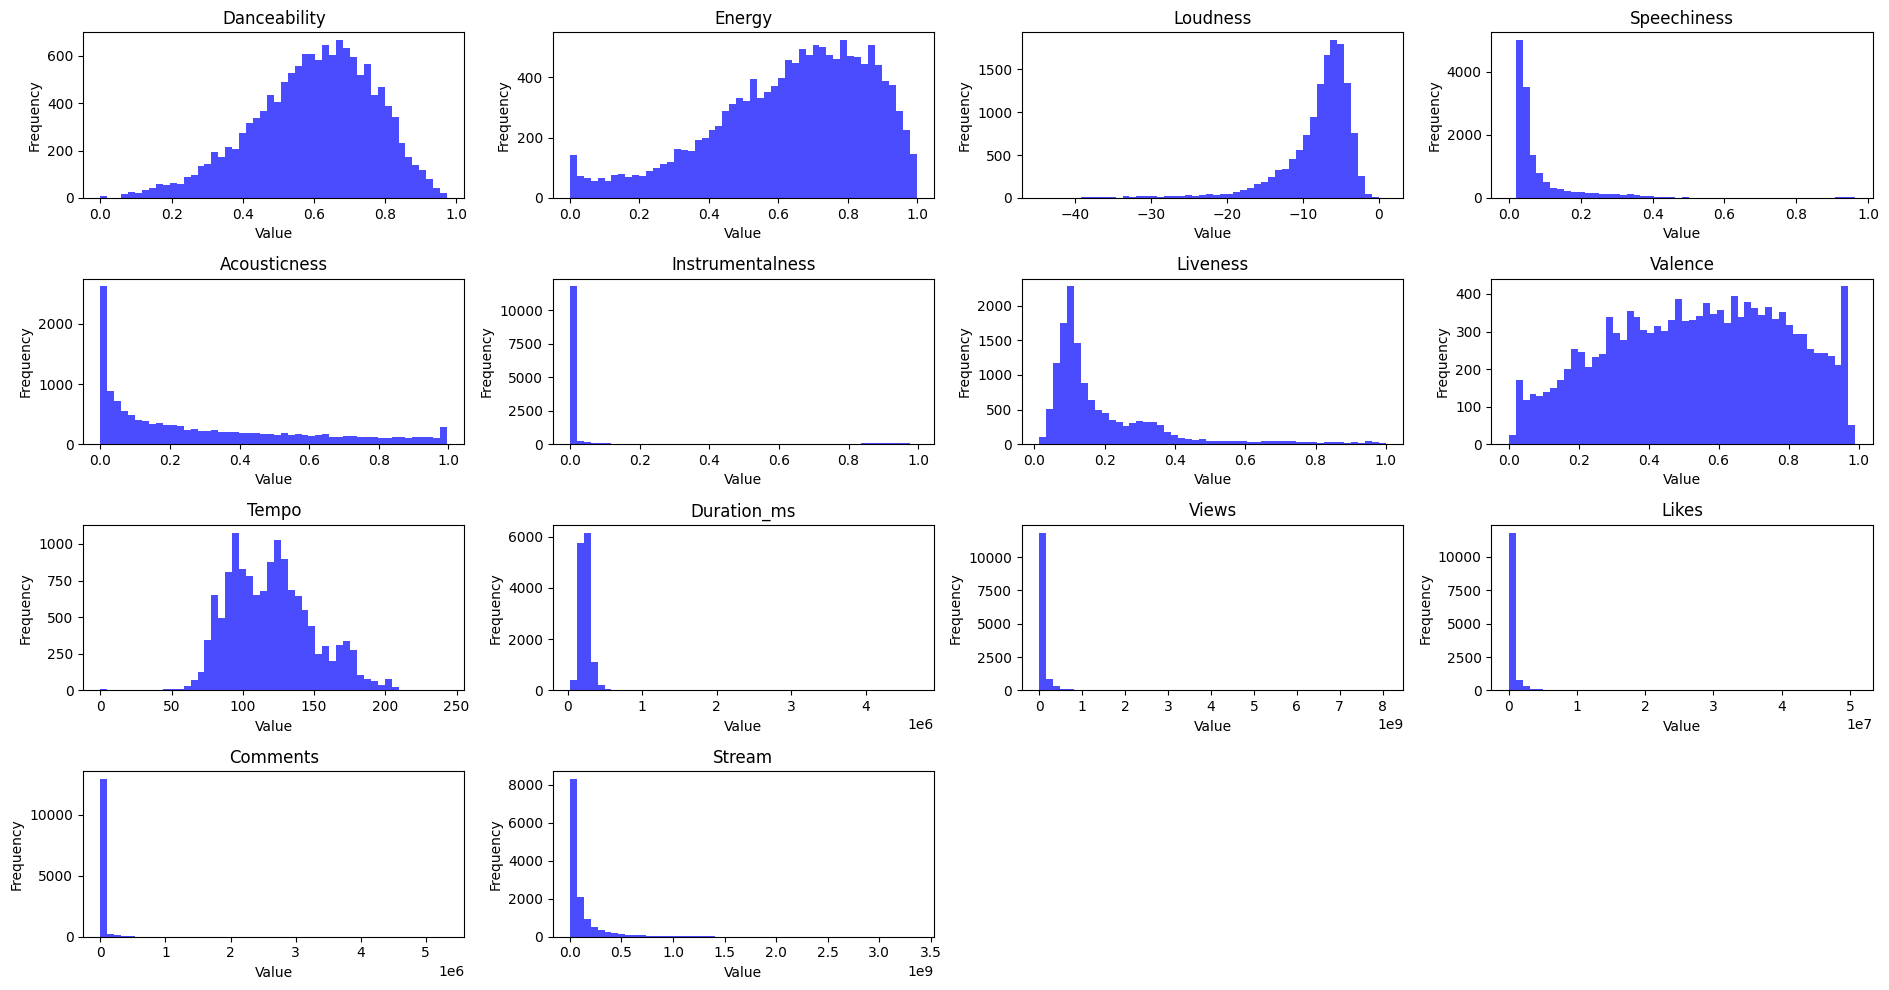

In [ ]:
num_cols = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
            "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms",
            "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 4  # Number of columns in the subplot grid
n_rows = len(num_cols) // n_cols + (1 if len(num_cols) % n_cols > 0 else 0)  # Calculate rows, add an extra row if needed

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for idx, column in enumerate(num_cols):
    axs[idx].hist(df[column], bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_ylabel('Frequency')
    axs[idx].set_xlabel('Value')

# Hide any empty subplots
for ax in axs[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


As we can see from the above graphs, some data categories like views, likes, comments, and streams are highly skewed. Therefore, we need to scale them logarithmicly to normalize them:

# Histogram with logarithmic transformation

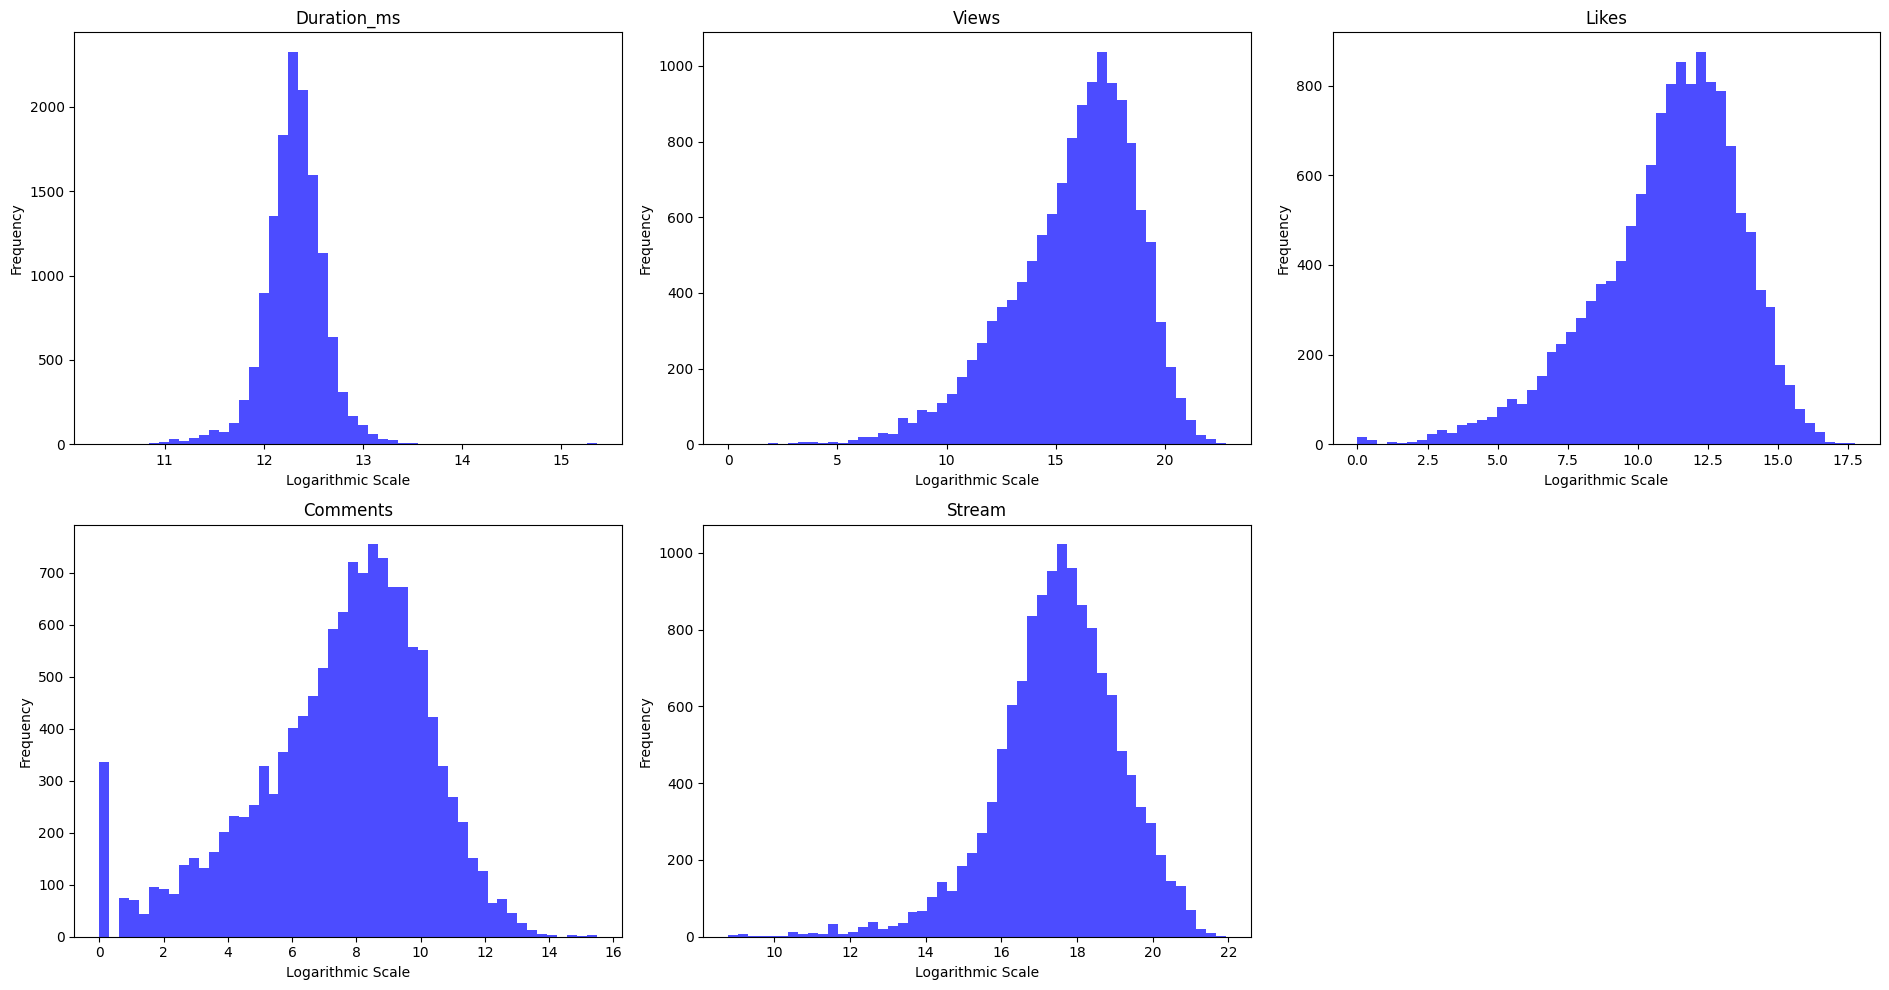

In [ ]:
logarithmic_categories = ["Duration_ms", "Views", "Likes", "Comments", "Stream"]

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = len(logarithmic_categories) // n_cols + (1 if len(logarithmic_categories) % n_cols > 0 else 0)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(19, 10))
axs = axs.flatten()

for idx, column in enumerate(logarithmic_categories):
    # Apply a logarithmic transformation with a small shift to handle zero values
    logarithmic_data = np.log(df[column] + 1)
    axs[idx].hist(logarithmic_data, bins=50, color='blue', alpha=0.7)
    axs[idx].set_title(column)
    axs[idx].set_xlabel('Logarithmic Scale')
    axs[idx].set_ylabel('Frequency')

# Hide any empty subplots
for ax in axs[len(logarithmic_categories):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Pie charts

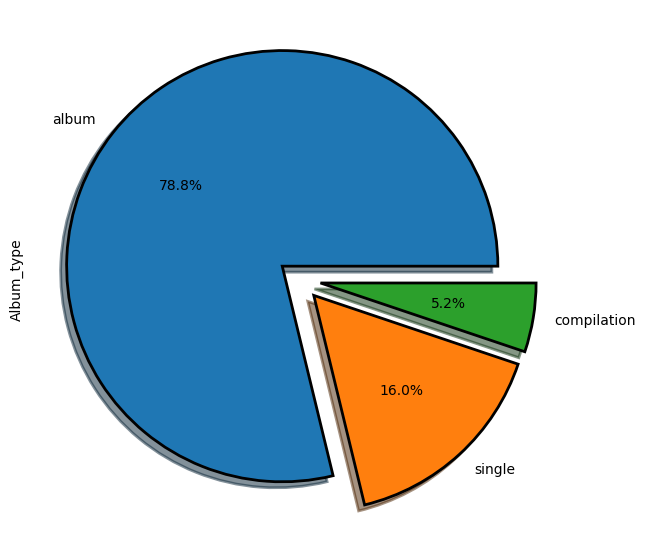

In [ ]:
df_only_categorical = df[categorical_columns]
df_only_categorical['Album_type'].value_counts()

fig = plt.figure(figsize=(10, 7))
df_only_categorical['Album_type'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,explode=(0.1,0.1,0.1),wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

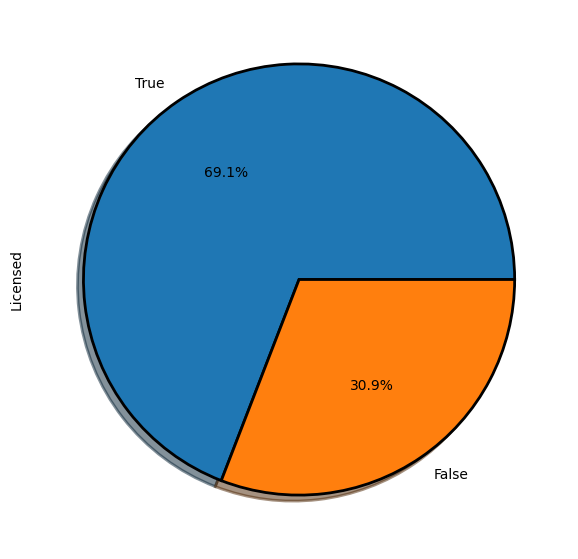

In [ ]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['Licensed'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

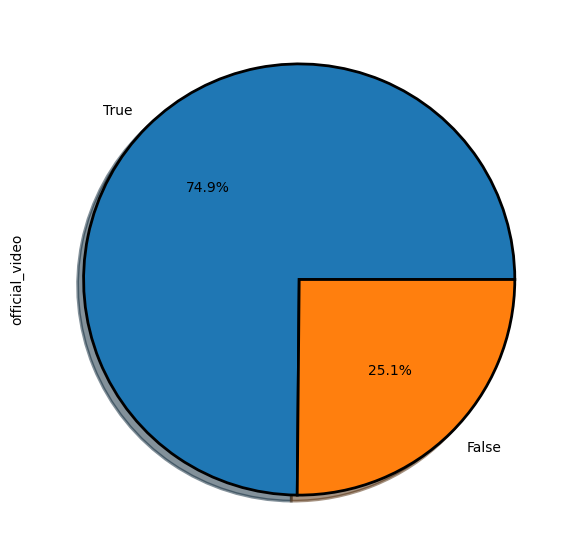

In [ ]:
fig = plt.figure(figsize=(10, 7))
df_only_categorical['official_video'].value_counts().plot(kind='pie', autopct='%0.1f%%',shadow=True,wedgeprops={'linewidth':2,'edgecolor':'black'})

plt.show()

#Dropping Irrelevant Features

We would want to drop some features from our dataset that are not relevant for hte purposes of traning the model. They will however be used in later stages of this project.

These are columns that hold values which are unique to each of the records in our dataset. Some of these include the song's title, url, description, etc.

In the end after the model is trained and when we provide song recommendations to users after performing clustering, this information would be used.

In [ ]:
def drop_irrelevant_cols(df, irrelevant_columns):

    input_num_cols = df.shape[1]
    print(f"The original dataset has {input_num_cols} columns", end = "\n\n")

    df = df.drop(columns=irrelevant_columns)
    print(f"{len(irrelevant_columns)} columns were successfully dropped from the dataframe!")
    print(irrelevant_columns, end = "\n\n")

    output_num_cols = df.shape[1]
    print(f"The final dataset has {output_num_cols} columns", end = "\n\n")

    return df

In [ ]:
irrelevant_columns = ['Url_youtube', 'Url_spotify', 'Uri', 'Unnamed: 0', 'Channel', 'Licensed', 'official_video']
df = drop_irrelevant_cols(df, irrelevant_columns)
df.head()

The original dataset has 28 columns

7 columns were successfully dropped from the dataframe!
['Url_youtube', 'Url_spotify', 'Uri', 'Unnamed: 0', 'Channel', 'Licensed', 'official_video']

The final dataset has 21 columns



,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Title,Views,Likes,Comments,Description,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.6130,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0463,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.1160,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0640,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0698,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,6.172597e+08


#Data Imputation

There are some records in the dataset that have null values. Since this only applies to less than 3 percent of the data, we will be dropping it.

In [ ]:
def drop_null_values(df):

    initial_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe before dropping nulls: {initial_num_rows}", end = "\n\n")

    df.dropna(inplace=True)
    print(f"Null values were dropped from the dataframe!", end = "\n\n")

    output_num_rows = df.shape[0]
    print(f"Number of rows in the dataframe after dropping nulls: {output_num_rows}", end = "\n\n")

    return df

In [ ]:
df = drop_null_values(df)
df.head()

Number of rows in the dataframe before dropping nulls: 13781

Null values were dropped from the dataframe!

Number of rows in the dataframe after dropping nulls: 12611



,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Title,Views,Likes,Comments,Description,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.6130,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0463,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.1160,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0640,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0698,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,6.172597e+08


#Data Encoding (One Hot)

In [ ]:
def oneHotEncodeFeatures(df, feature_list):

    print("Features we are encoding:")
    print(feature_list, end = "\n\n")
    encoder = OneHotEncoder()

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    encoded_df = pd.DataFrame(encoder.fit_transform(df[feature_list]).toarray())
    print("One hot encoding completed!", end = "\n\n")

    df.drop(columns=feature_list)

    df = df.join(encoded_df)

    print(f"Number of columns before one hot encoding {df.shape[1]}", end = "\n\n")

    return df

In [ ]:
df = oneHotEncodeFeatures(df, ['Key',  'Album_type'])
df

Features we are encoding:
['Key', 'Album_type']

Number of columns before one hot encoding 21

One hot encoding completed!

Number of columns before one hot encoding 36



,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,5,6,7,8,9,10,11,12,13,14
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13775,Kontra K,Blei (feat. Veysel),Sie wollten Wasser doch kriegen Benzin,album,0.798,0.668,11.0,-5.712,0.2710,0.130000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13776,Kontra K,Tiefschwarz (feat. Samra),Vollmond,album,0.751,0.783,7.0,-5.926,0.2200,0.071500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13777,Kontra K,Wieder 2015,Für den Himmel durch die Hölle,album,0.715,0.826,0.0,-4.458,0.1440,0.056900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13778,Kontra K,Adam & Eva,Für den Himmel durch die Hölle,album,0.763,0.817,7.0,-5.522,0.2450,0.136000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Encoding (Frequency (popularity) Encoding)

In [ ]:
#Let's try frequency based encoding!


def prep_view_based_encoding_artist(df):
    # Calculate the total views for each artist
    artist_views = df.groupby('Artist')['Views'].sum().reset_index()
    artist_views.columns = ['Artist', 'TotalViews']

    # Sort artists by total views (highest first)
    artist_views = artist_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    artist_to_numeric = {artist: i for i, artist in enumerate(artist_views['Artist'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Artist_encoded'] = df['Artist'].map(artist_to_numeric)
    df['Artist_encoded'] = df['Artist_encoded'].fillna(-1).astype(int)

    return df


def prep_view_based_encoding_album(df):
    # Calculate the total views for each artist
    album_views = df.groupby('Album')['Views'].sum().reset_index()
    album_views.columns = ['Album', 'TotalViews']

    # Sort artists by total views (highest first)
    album_views = album_views.sort_values('TotalViews', ascending=False).reset_index(drop=True)

    # Create a mapping from artist names to a numeric label based on total views
    album_to_numeric = {album: i for i, album in enumerate(album_views['Album'])}

    # Map the artist names in the original dataframe to their numeric labels based on views
    df['Album_encoded'] = df['Album'].map(album_to_numeric)
    df['Album_encoded'] = df['Album_encoded'].fillna(-1).astype(int)

    return df



In [ ]:
prep_view_based_encoding_artist(df)
df

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,131
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,131
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13775,Kontra K,Blei (feat. Veysel),Sie wollten Wasser doch kriegen Benzin,album,0.798,0.668,11.0,-5.712,0.2710,0.130000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898
13776,Kontra K,Tiefschwarz (feat. Samra),Vollmond,album,0.751,0.783,7.0,-5.926,0.2200,0.071500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898
13777,Kontra K,Wieder 2015,Für den Himmel durch die Hölle,album,0.715,0.826,0.0,-4.458,0.1440,0.056900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898
13778,Kontra K,Adam & Eva,Für den Himmel durch die Hölle,album,0.763,0.817,7.0,-5.522,0.2450,0.136000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898


In [ ]:
print(df)

                   Artist                                          Track  \
0                Gorillaz                                 Feel Good Inc.   
1                Gorillaz                                Rhinestone Eyes   
2                Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3                Gorillaz                             On Melancholy Hill   
4                Gorillaz                                 Clint Eastwood   
...                   ...                                            ...   
13775            Kontra K                            Blei (feat. Veysel)   
13776            Kontra K                      Tiefschwarz (feat. Samra)   
13777            Kontra K                                    Wieder 2015   
13778            Kontra K                                     Adam & Eva   
13780  Lin-Manuel Miranda                                        My Shot   

                                               Album Album_type  Danceability  \
0     

# Clustering

### Subsetting the data - using some continous columns

In [ ]:
df_cols = ['Danceability', 'Energy', "Loudness", "Speechiness", "Acousticness"]
df_with_song = df
df = df[df_cols]

In [ ]:
df

,Danceability,Energy,Loudness,Speechiness,Acousticness
0,0.818,0.705,-6.679,0.1770,0.008360
1,0.676,0.703,-5.815,0.0302,0.086900
2,0.695,0.923,-3.930,0.0522,0.042500
3,0.689,0.739,-5.810,0.0260,0.000015
4,0.663,0.694,-8.627,0.1710,0.025300
...,...,...,...,...,...
13775,0.798,0.668,-5.712,0.2710,0.130000
13776,0.751,0.783,-5.926,0.2200,0.071500
13777,0.715,0.826,-4.458,0.1440,0.056900
13778,0.763,0.817,-5.522,0.2450,0.136000


-----------

### Applying sklearn MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=df_cols)

In [ ]:
print(df.describe())

       Danceability        Energy      Loudness   Speechiness  Acousticness
count  12611.000000  12611.000000  12611.000000  12611.000000  12611.000000
mean       0.615636      0.637807      0.803066      0.089806      0.291562
std        0.174249      0.226728      0.110069      0.105928      0.295964
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.504615      0.500375      0.774994      0.035581      0.037197
50%        0.631795      0.675269      0.831856      0.048029      0.183733
75%        0.743590      0.813580      0.869070      0.090301      0.484939
max        1.000000      1.000000      1.000000      1.000000      1.000000


In [ ]:
df_with_song[df_cols] = df[df_cols]

In [ ]:
df_with_song.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,6,7,8,9,10,11,12,13,14,Artist_encoded
count,11535.000000,11535.000000,12611.00000,11535.000000,11535.000000,11535.000000,12611.000000,12611.000000,12611.000000,12611.000000,...,11535.000000,11535.000000,11535.000000,11535.000000,11535.000000,11535.000000,11535.000000,11535.000000,11535.000000,12611.000000
mean,0.615857,0.637587,5.23765,0.803377,0.090273,0.292084,0.065765,0.196265,0.538001,120.089564,...,0.065540,0.115735,0.068401,0.102384,0.062505,0.075249,0.787083,0.049848,0.163069,662.754817
std,0.174277,0.226300,3.56101,0.108952,0.106491,0.296140,0.209845,0.172822,0.249009,29.662338,...,0.247486,0.319920,0.252443,0.303166,0.242082,0.263805,0.409387,0.217641,0.369445,389.811587
min,0.000000,0.000000,0.00000,0.016922,0.000000,0.000000,0.000000,0.014500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.504615,0.499874,2.00000,0.775333,0.035581,0.037599,0.000000,0.092500,0.342000,96.103500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,324.000000
50%,0.631795,0.675269,5.00000,0.831746,0.048133,0.183733,0.000005,0.126000,0.549000,119.167000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,659.000000
75%,0.743590,0.813580,8.00000,0.868840,0.091286,0.485943,0.000909,0.245000,0.740500,139.092000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,997.000000
max,1.000000,1.000000,11.00000,1.000000,1.000000,1.000000,0.995000,1.000000,0.991000,243.372000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1361.000000


### Trying to determine n_clusters using silhouette_score

In [ ]:
Xtrain, X_test = train_test_split(df, test_size=0.2, random_state=42)

While performing analysis using the silhouette_score, we want to determine the ideal number of clusters. The following should be kept in mind while doing so: \\
1. Silhouette analysis can be used to study the separation distance between the resulting clusters. As we increase the number of clusters, the clusters tend to be located closer to one another it is expected for the silhouette_score to show a decreasing trend.
2. We have a bad pick if we have clusters with below average silhouette scores
3. We do not one of the clusters to have significantly more samples than the other clusters.


For n_clusters = 5 The average silhouette_score is : 0.24931377325597293
For n_clusters = 10 The average silhouette_score is : 0.23094835454848717
For n_clusters = 15 The average silhouette_score is : 0.22456698971981812
For n_clusters = 20 The average silhouette_score is : 0.20821236274217217
For n_clusters = 25 The average silhouette_score is : 0.2089502039604546


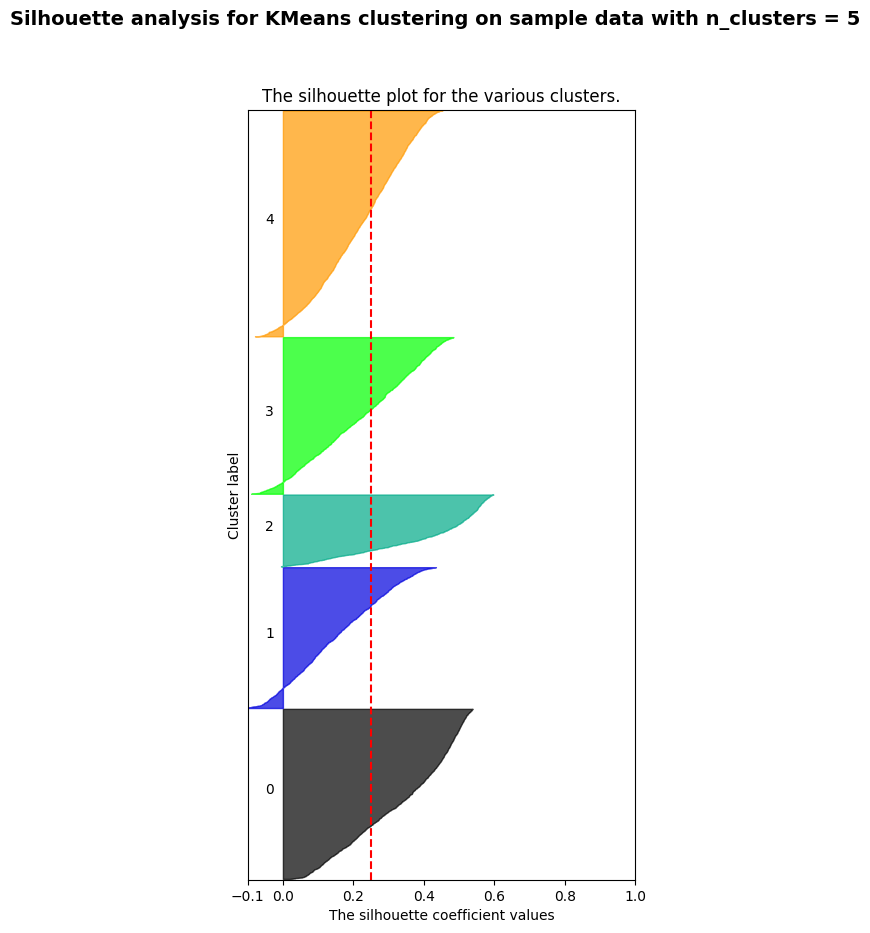

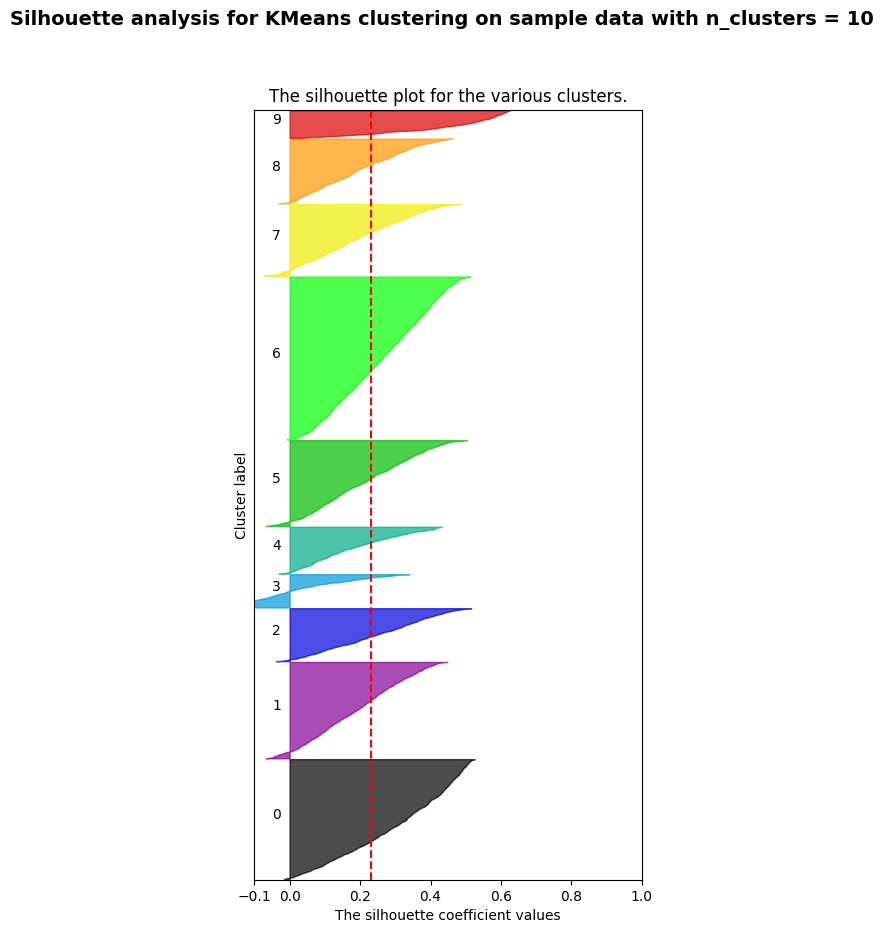

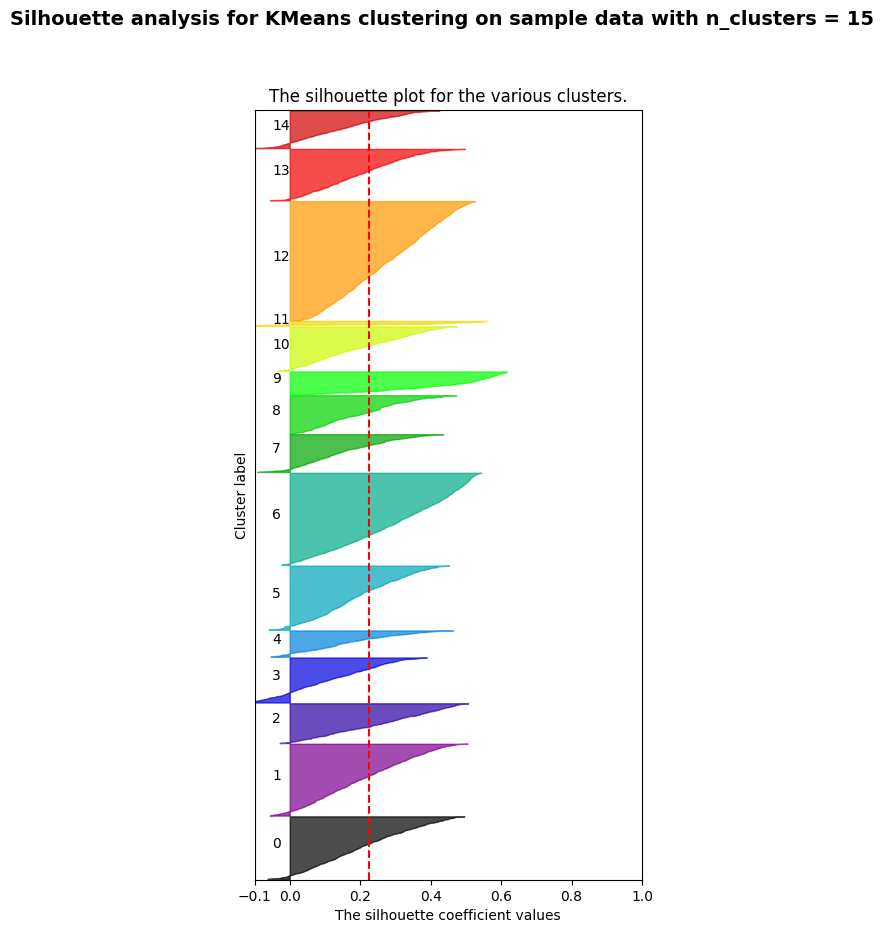

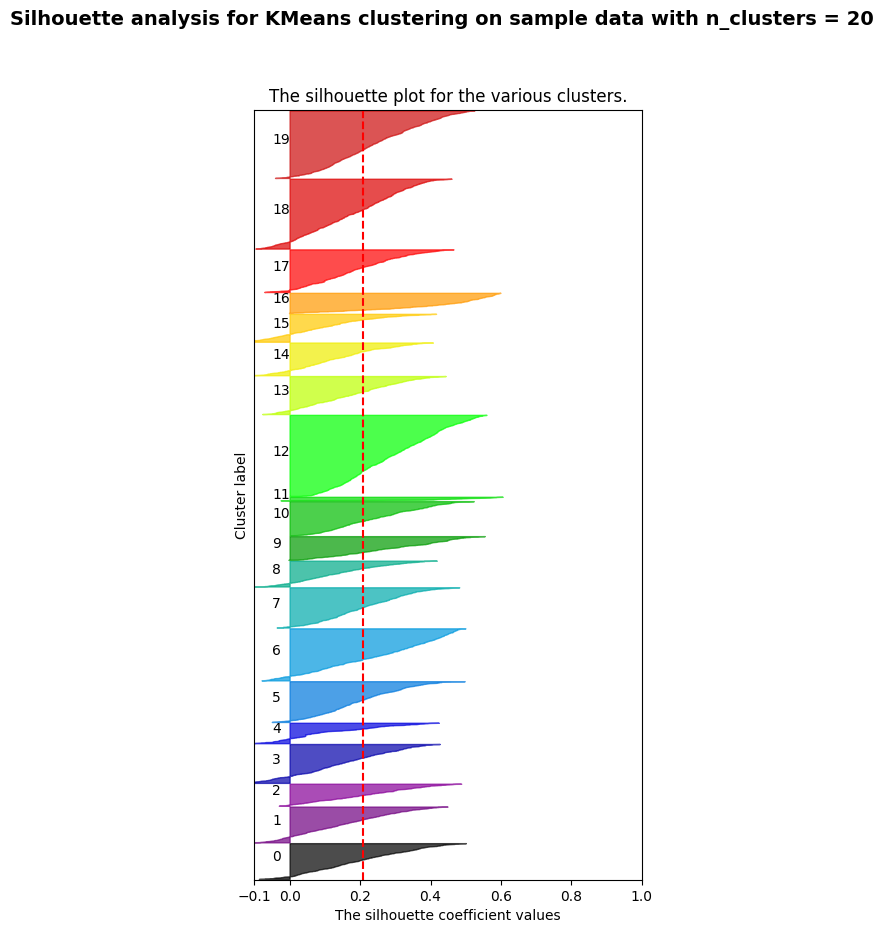

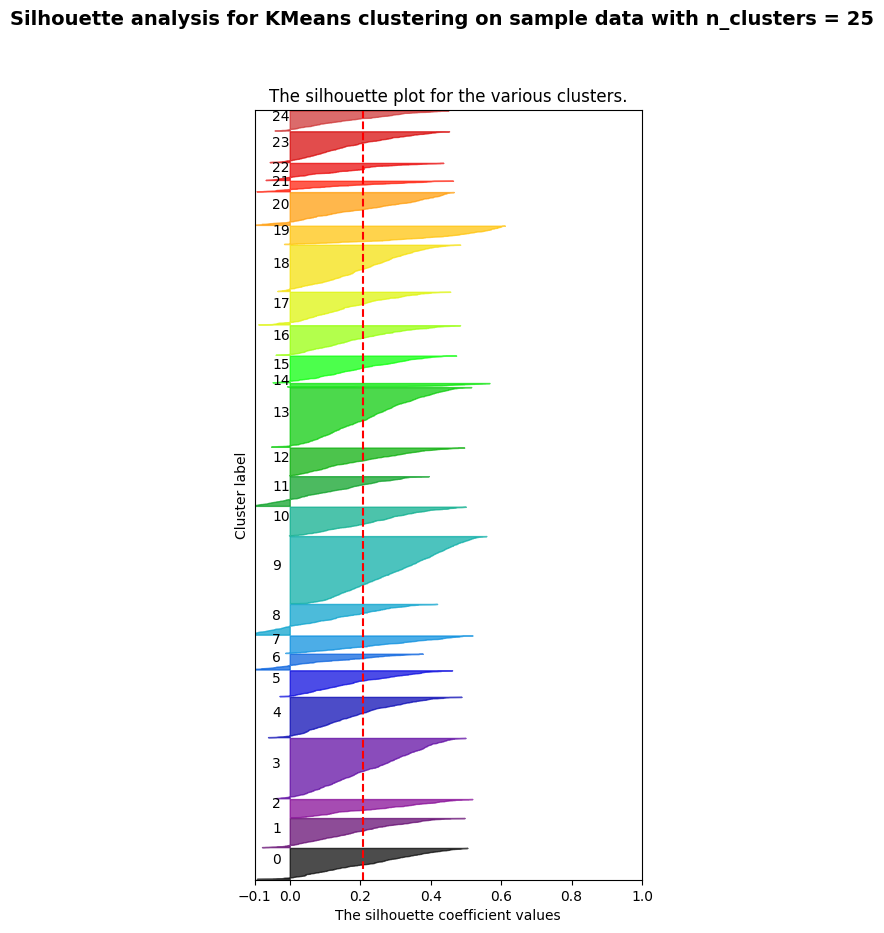

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(5, 30, 5):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(5, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(Xtrain) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto' ,random_state=10)
    cluster_labels = clusterer.fit_predict(Xtrain)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xtrain, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtrain, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

We see that with less than 20 clusters, there are classes that are disproportionately larger than some of the other ones. We should be fine picking n_clusters = 20 or greater since the records are distributed among clusters better and the silhouette coefficient for each of them is greater than the average indicated by the red dotted line.

### Performing clustering with n_clusters = 20

In [ ]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(Xtrain)

### Mapping songs to clusters -- `Artist` and `Track`




In [ ]:
df_with_song

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,6,7,8,9,10,11,12,13,14,Artist_encoded
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.838974,0.706339,6.0,0.833651,0.183610,0.008392,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.693333,0.704334,8.0,0.852565,0.031328,0.087247,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,131
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.712821,0.924831,1.0,0.893829,0.054149,0.042669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,131
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.706667,0.740415,2.0,0.852674,0.026971,0.000013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,131
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.680000,0.695314,10.0,0.791007,0.177386,0.025400,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13775,Kontra K,Blei (feat. Veysel),Sie wollten Wasser doch kriegen Benzin,album,NaN,NaN,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898
13776,Kontra K,Tiefschwarz (feat. Samra),Vollmond,album,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898
13777,Kontra K,Wieder 2015,Für den Himmel durch die Hölle,album,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898
13778,Kontra K,Adam & Eva,Für den Himmel durch die Hölle,album,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898


In [ ]:
# Analyzing the cluster labels
# We create a map data structure to map a cluster number to the songs in that cluster

print("The following are the labels associated with each cluster:")
print(kmeans.labels_)
print("Length: " , len(kmeans.labels_))

map = {}
for i in range(len(kmeans.labels_)):
    label = kmeans.labels_[i]

    artist = df_with_song.iloc[i]['Artist']
    track = df_with_song.iloc[i]['Track']

    if label not in map:
        map[label] = [(artist, track),]

    else:
        map[label].append((artist, track))

The following are the labels associated with each cluster:
[ 5 17 17 ... 18 11  6]
Length:  10088


### Getting user preferences


In [ ]:
def get_user_preferences():
    user_input = []
    print("Please enter your music preferences on a scale of 0 to 1")
    for col in df_cols:
        try:
            rating = float(input(f"{col} score: "))
            assert 0 <= rating <= 1, "\nASSERT FAILED: Score must be between 0 and 1"
            user_input.append (rating)
        except AssertionError as e:
            print(e)
            break
        except ValueError:
            print("\nEXCEPTION ENCOUNTERED: Input must be a number.")
            break
    return np.array(user_input)

user_preferences = get_user_preferences()

Please enter your music preferences on a scale of 0 to 1


KeyboardInterrupt: Interrupted by user

### Obtaining the cluster corresponding to user preferences

In [ ]:
user_preferences = user_preferences.reshape(1, 5)
user_preferences_df = pd.DataFrame(user_preferences, columns=df_cols)
user_preferences_df

In [ ]:
cluster = kmeans.predict(user_preferences_df)[0]
print("Cluster the user's preferences fit into:", cluster)

### Obtaining a random sample of songs corresponding to the cluster associated with the user

In [ ]:
import random

NUM_SONSGS_TO_SUGGEST = 5

songs_rec = random.sample(map[cluster], NUM_SONSGS_TO_SUGGEST)

In [ ]:
print("Here are songs you may like...")

songs_rec_df = pd.DataFrame(songs_rec, columns=['Artist', 'Title'])

In [ ]:
songs_rec_df

In [ ]:
# Get the information from the database about one of the songs that were recommended.
getArtist = songs_rec_df.iloc[0]['Artist']
getTrack = songs_rec_df.iloc[0]['Title']

In [ ]:
df_with_song[(df_with_song['Artist'] == getArtist) & (df_with_song['Track'] == getTrack)]

**Note:** We will try to improve the accuracy of the predictions here for our upcoming model using approaches like K Nearest Neighbors instead of using uniform sampling within a cluster

## Training and Test Accuracy of our First Model

Now we'll find the training error using Within-Cluster Sum of Square metrics. Note that we divide by the length of the training set to account for the fact that WCSS takes a simple sum, and the training/test set will be disproportionately sized.

In [ ]:
# Inertia of the kmeans model refers to sum of squared distances of samples to
# their closest cluster center.
kmeans.inertia_ / len(Xtrain)

Now we'll find the testing error.

In [ ]:
train_cluster_labels = kmeans.predict(X_test)

wcss_train = 0
for i in range (n_clusters):
  center = kmeans.cluster_centers_[i]
  train_labels = X_test[train_cluster_labels == i]
  wcss_train += np.sum((train_labels - center)**2)

wcss_test = np.sum(wcss_train)

wcss_test / len(X_test)

We find that our training error and testing error, as measured by WCSS, are very similar.  This suggests that our model is neither overfitting nor underfitting, as either of these situations should suggest a larger discrepancy between our errors.  Thus, on the fitting graph, we are in a well-situated spot.

# Second Model

In [ ]:
from sklearn.cluster import DBSCAN

Xtrain, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
Xtrain

,Danceability,Energy,Loudness,Speechiness,Acousticness
11079,0.699487,0.649210,0.833935,0.371369,0.458834
11790,0.837949,0.711350,0.862656,0.140041,0.167669
8869,0.845128,0.698321,0.799370,0.038589,0.009024
3058,0.628718,0.600099,0.834198,0.035685,0.267067
4415,0.616410,0.807567,0.879622,0.035788,0.052910
...,...,...,...,...,...
11964,0.735385,0.659233,0.872091,0.031432,0.547188
5191,0.754872,0.262339,0.685602,0.031017,0.309236
5390,0.661538,0.450763,0.835862,0.034544,0.092468
860,0.078872,0.084538,0.410762,0.046680,0.925703


According to [this journal](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf), a way to choose the ideal epsilon value for a DBSCANS model is to observe the "elbow", or the point of curvature.  We use the knowledge to guide our hyperparameter search.

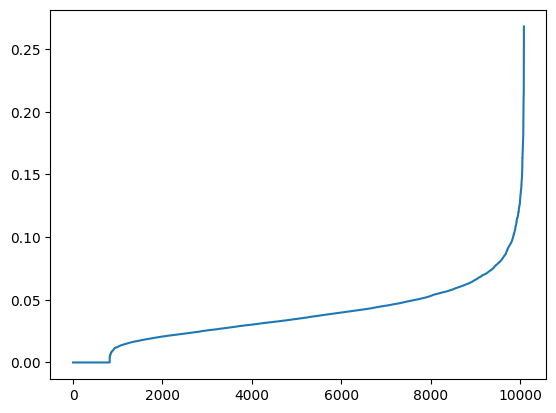

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(Xtrain)
distances, indices = neighbors_fit.kneighbors(Xtrain)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We observe that the "elbow" is found approximately towards the 0.05 to 0.1 range; we may now use this to guide our hyperparameter search for epsilon.

In [ ]:
# We will iteratively tune for various values of min_samples and eps, tracking the values combination that provides the best model
# The metric we shall use is the silhouette_score to determine how closely related each cluster is.

best_eps = 0
best_min_samples = 0

best_score = 0


EPS_START = 0.05
EPS_END = 0.1
EPS_STEP = 0.01
MIN_SAMPLES_START = 6
MIN_SAMPLES_END = 12
SAMPLE_STEP = 1

# Convert epsilon values to a list to iterate through
EPS_VALUES = []
k = EPS_START
while k <= EPS_END:
    EPS_VALUES.append(k)
    k += EPS_STEP

In [ ]:
from sklearn.metrics import silhouette_score

# Iteratively search through hyperparameters epsilon and min samples
for i in range(MIN_SAMPLES_START, MIN_SAMPLES_END + 1, SAMPLE_STEP):
    for j in EPS_VALUES:
        clustering = DBSCAN(eps=j, min_samples=i).fit(Xtrain)
        Xtrain['cluster'] = clustering.labels_
        Xtrain['cluster'].value_counts()

        # Evaluate the clusters via silhouette score
        score = silhouette_score(Xtrain.drop(columns=['cluster']), Xtrain['cluster'])
        print("Silhouette Score for eps = " + str(j) + ", min_samples = " + str(i) + ": " + str(score))

        # If these hyperparameters produce a better score than we last checked for, save it!
        if abs(score) > best_score:
            best_score = abs(score)

            # Save hyperparameters
            best_eps = j
            best_min_samples = i

            print("New optimal hyperparameters found!")

Silhouette Score for eps = 0.05, min_samples = 6: -0.5086751237150681
New optimal hyperparameters found!
Silhouette Score for eps = 0.060000000000000005, min_samples = 6: -0.45472396180852537
Silhouette Score for eps = 0.07, min_samples = 6: -0.3995256171838725
Silhouette Score for eps = 0.08, min_samples = 6: -0.3475225836358288
Silhouette Score for eps = 0.09, min_samples = 6: -0.31251185868351644
Silhouette Score for eps = 0.09999999999999999, min_samples = 6: -0.2851535026435765
Silhouette Score for eps = 0.05, min_samples = 7: -0.49259030814766336
Silhouette Score for eps = 0.060000000000000005, min_samples = 7: -0.4587224139485831
Silhouette Score for eps = 0.07, min_samples = 7: -0.403809052672697
Silhouette Score for eps = 0.08, min_samples = 7: -0.3531302797440489
Silhouette Score for eps = 0.09, min_samples = 7: -0.31683559222495833
Silhouette Score for eps = 0.09999999999999999, min_samples = 7: -0.29048256570317565
Silhouette Score for eps = 0.05, min_samples = 8: -0.503181

In [ ]:
print("Optimal Parameters Found -> eps = " + str(best_eps) + ", min_samples = " + str(best_min_samples) + " -> Score: " + str(best_score))

Optimal Parameters Found -> eps = 0.05, min_samples = 6 -> Score: 0.5086751237150681


We create a model based on the optimal parameters

In [ ]:
# fit returns a fitted instance of self
model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clustering = model.fit(Xtrain)

In [ ]:
# we will now assign the clusters corresponding to the best set of hyperparameters found
Xtrain['cluster'] = clustering.labels_

In [ ]:
# Unique for each point in the dataset given to fit()
# Noisy samples are given the label -1.
Xtrain['cluster'].unique()

array([ -1,   1,   0,   2,  10, 104,   3,  33,  38, 101,   4,  22,  23,
        18, 110,   5,   6,   7,  37,  67,   8,   9,  61,  41,  11,  21,
        12,  27,  84,  13,  29,  14,  15,  53,  76,  16,  17,  43,  19,
        20,  63,  56,  28,  52,  24,  25,  26,  72,  70,  34,  80, 109,
        92,  97,  42,  74,  30,  85,  69,  93,  31, 114,  54,  32,  77,
        62,  60,  78, 117,  86,  51,  35,  36, 112,  39,  94,  40,  90,
        55,  89,  44,  91,  45,  57, 116,  46,  47,  98,  79,  48,  49,
        50,  75,  96, 115,  65, 111, 100,  88,  58,  59,  95, 103,  64,
        81,  66,  87, 102, 108,  68,  82, 106,  71, 113,  73,  99, 105,
        83, 107])

In [ ]:
import numpy as np
import scipy as sp

"""
Source: for the function dbscan_predict
https://stackoverflow.com/questions/27822752/scikit-learn-predicting-new-points-with-dbscan
"""
def dbscan_predict(dbscan_model, X_new, metric=sp.spatial.distance.cosine):
    # Result is noise by default
    y_new = np.ones(shape=len(X_new), dtype=int)*-1
    # Iterate all input samples for a label
    for j, x_new in enumerate(X_new):
        # Find a core sample closer than EPS
        core_sample_features = dbscan_model.components_[:5]
        core_sample_cluster = dbscan_model.components_[-1]

        for i, x_core in enumerate(dbscan_model.components_):
            x_core = x_core[:-1]
            if metric(x_new, x_core) < dbscan_model.eps:
                # Assign label of x_core to x_new
                y_new[j] = dbscan_model.labels_[dbscan_model.core_sample_indices_[i]]
                break

    return y_new

# convert the dataframe to a numpy array to get predictions on the the test
yhat_test = dbscan_predict(model, X_test.to_numpy())

In [ ]:
np.unique(yhat_test)

array([-1,  0,  1,  2,  3,  4,  5,  7,  9, 11, 12, 14, 16, 19, 20, 21, 25,
       46, 47, 49, 50, 56])

In [ ]:
X_test['cluster'] = yhat_test

In [ ]:
Xtrain

,Danceability,Energy,Loudness,Speechiness,Acousticness,cluster
11079,0.699487,0.649210,0.833935,0.371369,0.458834,-1
11790,0.837949,0.711350,0.862656,0.140041,0.167669,-1
8869,0.845128,0.698321,0.799370,0.038589,0.009024,1
3058,0.628718,0.600099,0.834198,0.035685,0.267067,0
4415,0.616410,0.807567,0.879622,0.035788,0.052910,1
...,...,...,...,...,...,...
11964,0.735385,0.659233,0.872091,0.031432,0.547188,-1
5191,0.754872,0.262339,0.685602,0.031017,0.309236,-1
5390,0.661538,0.450763,0.835862,0.034544,0.092468,-1
860,0.078872,0.084538,0.410762,0.046680,0.925703,-1


In [ ]:
X_test

,Danceability,Energy,Loudness,Speechiness,Acousticness,cluster
8140,0.928205,0.963919,0.909875,0.088797,0.030018,0
11389,0.892308,0.479829,0.809571,0.171162,0.161645,0
1945,0.614359,0.932849,0.878002,0.076245,0.030320,0
7981,0.761026,0.400650,0.853900,0.037033,0.335340,0
9359,0.443077,0.657228,0.877652,0.443983,0.048994,9
...,...,...,...,...,...,...
3717,0.146667,0.001692,0.205906,0.046680,0.935743,5
4122,0.633846,0.894763,0.838117,0.113071,0.171685,0
2777,0.531282,0.547982,0.863576,0.051141,0.010641,0
2108,0.784615,0.290402,0.605153,0.144191,0.028010,1


## Training and Test Accuracy of our Second Model

Now we'll find the training error using Within-Cluster Sum of Square metrics. Note that we divide by the length of the training set to account for the fact that WCSS takes a simple sum, and the training/test set will be disproportionately sized.

In [149]:
# finding the cluster centers corresponding to the cluster labels
clusters = Xtrain.groupby("cluster").mean()
clusters

,Danceability,Energy,Loudness,Speechiness,Acousticness
cluster,,,,,
-1,0.615346,0.580174,0.783692,0.116461,0.373474
0,0.629407,0.637255,0.831276,0.037803,0.247204
1,0.628690,0.813047,0.862568,0.054783,0.041573
2,0.756703,0.846597,0.875464,0.050492,0.275788
3,0.706120,0.702530,0.860915,0.036259,0.258968
...,...,...,...,...,...
113,0.503761,0.653052,0.840951,0.035149,0.575635
114,0.568547,0.465797,0.728074,0.030947,0.326304
115,0.409915,0.098470,0.550718,0.040595,0.907798


In [150]:
# we remove the first row since -1 corresponds to noise
clusters = clusters.iloc[1:]
clusters

,Danceability,Energy,Loudness,Speechiness,Acousticness
cluster,,,,,
0,0.629407,0.637255,0.831276,0.037803,0.247204
1,0.628690,0.813047,0.862568,0.054783,0.041573
2,0.756703,0.846597,0.875464,0.050492,0.275788
3,0.706120,0.702530,0.860915,0.036259,0.258968
4,0.595013,0.514804,0.807759,0.034855,0.362345
...,...,...,...,...,...
113,0.503761,0.653052,0.840951,0.035149,0.575635
114,0.568547,0.465797,0.728074,0.030947,0.326304
115,0.409915,0.098470,0.550718,0.040595,0.907798


In [151]:
# convert cluster centers to numpy array
cluster_centers = clusters.to_numpy()

In [167]:
def get_wcss_score_data(cluster_centers, model, data):

    wcss_score = 0
    for i in range (len(cluster_centers)):
        cluster_center = cluster_centers[i]
        points = data[data['cluster'] == i]

        # remove cluster column to only keep features
        points = points.iloc[:, :-1]

        wcss_score += np.sum((cluster_center - points)**2)

    return np.round(sum(wcss_score) / len(data), 2)

In [168]:
print("WCSS equivalent for train data:", get_wcss_score_data(cluster_centers, model, Xtrain))
print("WCSS equivalent for test data:", get_wcss_score_data(cluster_centers, model, X_test))

WCSS equivalent for train data: 0.01
WCSS equivalent for test data: 0.1


# Citations

Used sklearn documentation for k means clustering and silhouette_score evaluation